<a href="https://colab.research.google.com/github/shirleyzz/cap5610_machineleanrning/blob/master/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import matplotlib.pyplot as plt

# load train and test data
(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()
# preprocess data
train_images = train_images_original.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images_original.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
#put label into 10 classes
train_labels = to_categorical(train_labels_original, num_classes=10) 
test_labels = to_categorical(test_labels_original, num_classes=10)

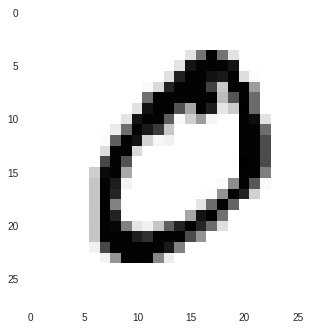

In [203]:
#have a look at label 0
plt.imshow(train_images_original[1])
plt.grid(None)
plt.show()

In [0]:
#round the grey values of the images to 1 and 0 to obtain black and white images
x_train = ((train_images_original/255)<0.5)*1
x_test = ((test_images_original/255)<0.5)*1

In [0]:
# program to count islands in the matrix in the training and test set
class Matrix: 
	def __init__(self, n_samples, n_features, graph): 
		self.n_samples = n_samples 
		self.n_features = n_features
		self.graph = graph

	# return row number is in range, column number is in range and value is 1 and not yet visited 
	def Pixel_visited(self, i, j, visited): 
		
		return (i >= 0 and i < self.n_samples and
				j >= 0 and j < self.n_features and
				not visited[i][j] and self.graph[i][j]) 
			

	# return 8 neighbours as adjacent vertices of a matrix
	def find_adjacent_vertices(self, i, j, visited): 

		# array defines 8 neighbours of a given pixel 
		rowNbr = [-1, -1, -1, 0, 0, 1, 1, 1]; 
		colNbr = [-1, 0, 1, -1, 1, -1, 0, 1]; 
		
		visited[i][j] = True
		for k in range(8): 
			if self.Pixel_visited(i + rowNbr[k], j + colNbr[k], visited): 
				self.find_adjacent_vertices(i + rowNbr[k], j + colNbr[k], visited) 


	# return count of islands in a given matrix 
	def countIslands(self): 
		# initialize unvisited pixels 
		visited = [[False for j in range(self.n_features)]for i in range(self.n_samples)] 
		count = 0
		for i in range(self.n_samples): 
			for j in range(self.n_features): 
				if visited[i][j] == False and self.graph[i][j] ==1: 
					self.find_adjacent_vertices(i, j, visited) 
					count += 1
		return count 

In [0]:
#a group of connected 1's forms an island
#this function will return number of islands
def find_island(graph):
  num_row = len(graph) 
  num_col = len(graph[0]) 
  m= Matrix(num_row, num_col, graph) 
  num_island = m.countIslands()
  #print("Number of islands is:")
  #print(str(num_island))
  return num_island
#this function will add a new feature denoting numeber of white areas
def add_feature(X):
  n_samples = X.shape[0]
  new_column = np.zeros((n_samples,1))
  for item in range(n_samples):
    new_column[item,0] = find_island(X[item])
  #print(X.shape)
  #print(new_column)
  X_new = X.reshape(X.shape[0], -1)/255
  X_new = np.append(X_new, new_column/3, axis = 1)
  #print(X_new.shape)
#   X.append()
  return X_new

In [0]:
# find_island(x_train[17])
X_train = add_feature(x_train)
X_test = add_feature(x_test)  

In [211]:
# set up layers,and now it has 785 dims
model = keras.Sequential([
    keras.layers.Dense(10, input_dim=785, activation=tf.nn.softmax)
])

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# compile the model
model.compile(optimizer=sgd, loss='categorical_crossentropy',metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(X_train, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(X_test, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 52us/step - loss: 2.1685 - acc: 0.1963 - val_loss: 2.0810 - val_acc: 0.2047
Epoch 2/20
60000/60000 [==============================] - 3s 49us/step - loss: 2.0342 - acc: 0.2068 - val_loss: 2.0022 - val_acc: 0.2047
Epoch 3/20
60000/60000 [==============================] - 3s 48us/step - loss: 1.9772 - acc: 0.2231 - val_loss: 1.9609 - val_acc: 0.2047
Epoch 4/20
60000/60000 [==============================] - 3s 48us/step - loss: 1.9450 - acc: 0.2443 - val_loss: 1.9376 - val_acc: 0.2440
Epoch 5/20
60000/60000 [==============================] - 3s 48us/step - loss: 1.9245 - acc: 0.2770 - val_loss: 1.9190 - val_acc: 0.2440
Epoch 6/20
60000/60000 [==============================] - 3s 48us/step - loss: 1.9099 - acc: 0.2816 - val_loss: 1.9067 - val_acc: 0.2440
Epoch 7/20
60000/60000 [==============================] - 3s 48us/step - loss: 1.8990 - acc: 0.2760 - val_loss: 1.8965 - val_acc

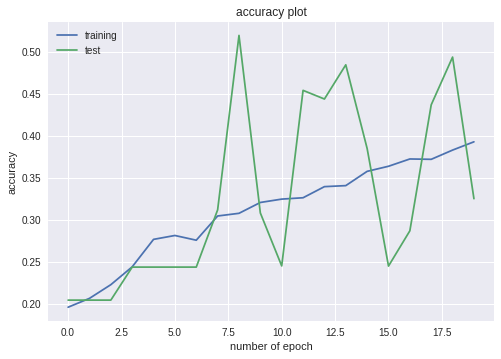

In [212]:
# accuracy plot
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('accuracy plot')
plt.ylabel('accuracy')
plt.xlabel('number of epoch')
plt.legend(['training', 'test'])
plt.show()

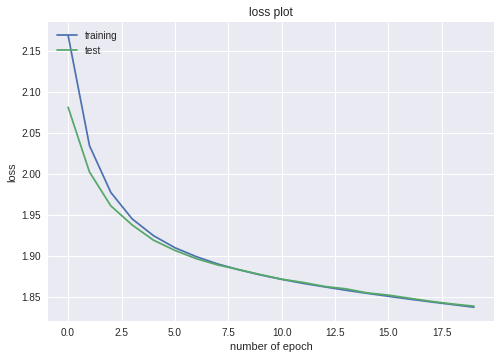

In [213]:
# loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss plot')
plt.ylabel('loss')
plt.xlabel('number of epoch')
plt.legend(['training', 'test'], loc='upper left')
plt.show()